# Example of quantum classifier using coherent state feature map

See https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html <br>
Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

<img src="../logo_circular.png" width="20" height="20" />@by claudio<br>
nonlinearxwaves@gmail.com<br>


@created 8 jan 2022 by claudio <br>
@version 22 may 2023

## Various imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Mesh step size

In [2]:
h = 0.02  # step size in the mesh

## Adopted classifier with Gaussian Radial Basis Function and gamma=-1/2

In [3]:
names = [
    "SVC with Gaussian RBF",
]

classifiers = [
    SVC(gamma=0.5, C=1),
]


## Plot dataset

In [4]:
dsplot = make_moons(noise=0.0, random_state=0)
X, y = dsplot

Check some points in the dataset

In [5]:
X.shape

(100, 2)

In [6]:
y.shape

(100,)

In [7]:
X[0,0::1]

array([-0.09602303,  0.99537911])

In [8]:
y[0::3]

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0])

Plot dataset

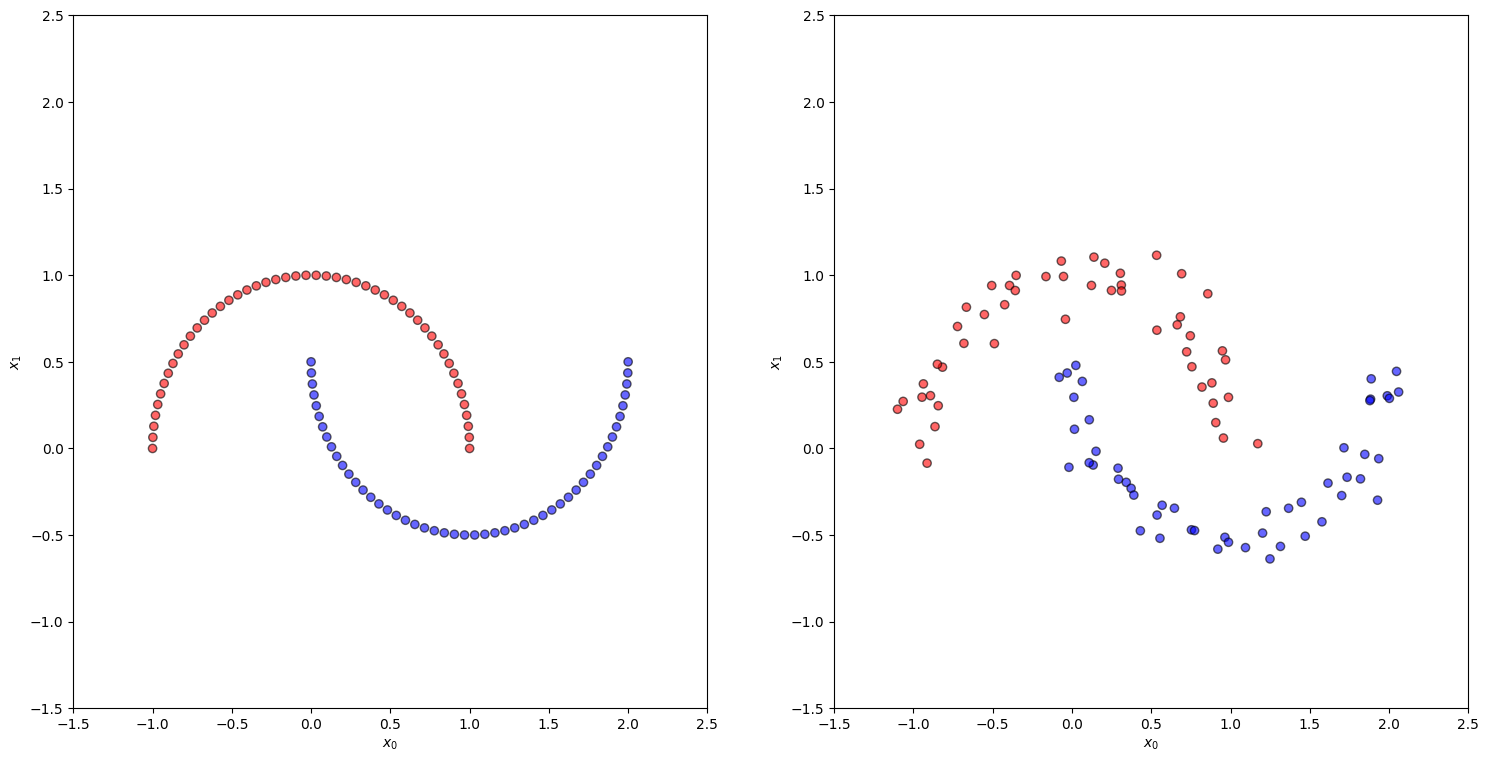

In [9]:
figure = plt.figure(figsize=(18, 9))
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
dsplot = make_moons(noise=0.0, random_state=0)
X, y = dsplot
ax = plt.subplot(1,2,1)
# Plot the testing points
ax.scatter(
        X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
ax1 = plt.subplot(1,2,2)
dsplot = make_moons(noise=0.1, random_state=0)
X, y = dsplot
# Plot the testing points
ax1.scatter(
        X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(-2, 2),
                         np.arange(2, 2, h));
ax1.set_xlim(-1.5, 2.5)
ax1.set_ylim(-1.5, 2.5)
ax.set_xlim(-1.5, 2.5)
ax.set_ylim(-1.5, 2.5)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax1.set_ylabel('$x_1$')
ax1.set_xlabel('$x_0$')
plt.savefig('moondataset.pdf',format='pdf')

## Fit different datasets

In [10]:
datasets = [
    make_moons(noise=0.1, random_state=0),
    make_circles(noise=0.1, factor=0.5, random_state=1),
]

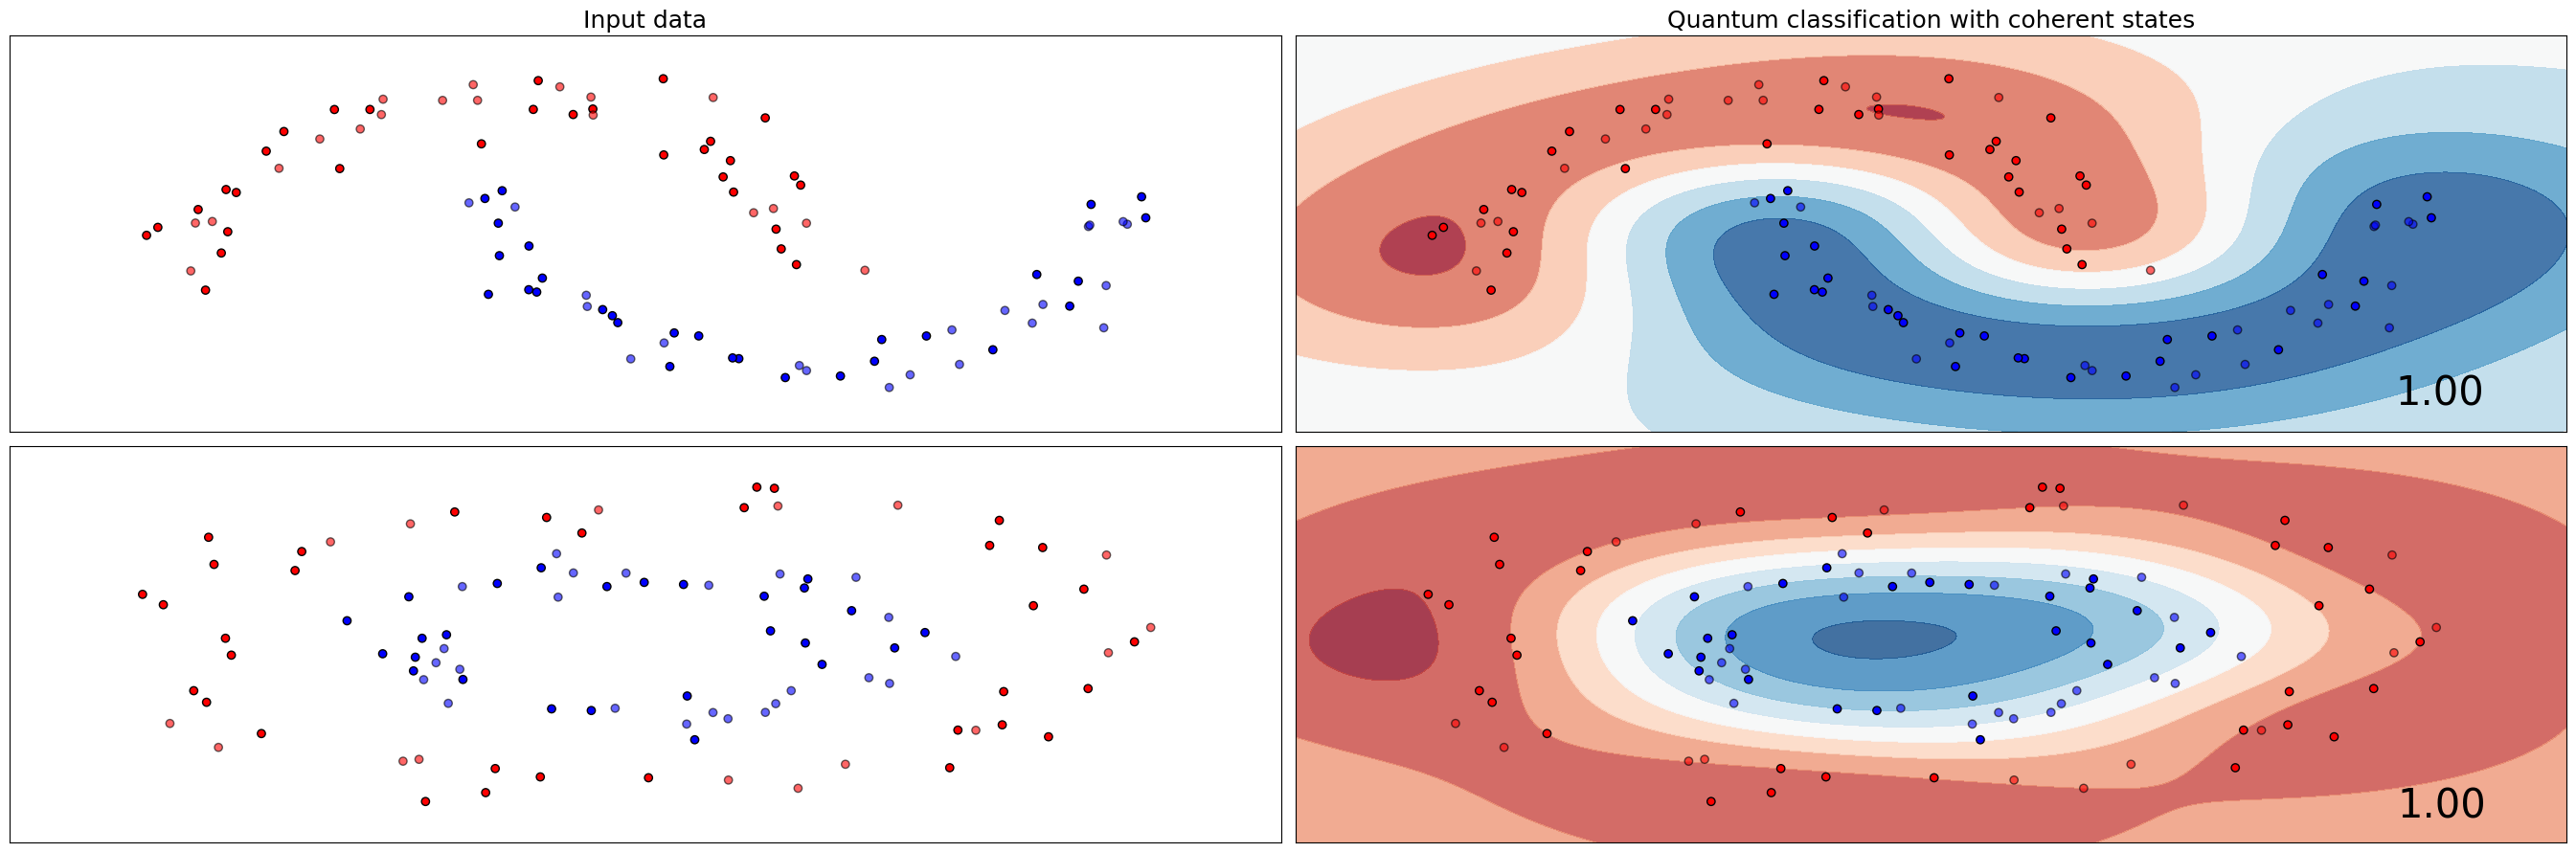

In [11]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data",{'fontsize':18})
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
               cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    clf = SVC(gamma=1.0)
    ax = plt.subplot(len(datasets), 2, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

    # Plot the training points
    ax.scatter(
        X_train[:, 0], X_train[:,
                               1], c=y_train, cmap=cm_bright, edgecolors="k"
    )
    # Plot the testing points
    ax.scatter(
        X_test[:, 0],
        X_test[:, 1],
        c=y_test,
        cmap=cm_bright,
        edgecolors="k",
        alpha=0.6,
    )

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title('Quantum classification with coherent states',{'fontsize':18})
    ax.text(
        xx.max() - 0.3,
        yy.min() + 0.3,
        ("%.2f" % score).lstrip("0"),
        size=30,
        horizontalalignment="right",
    )
    i += 1

plt.tight_layout()
plt.savefig('comparecoherent.pdf',format='pdf')
plt.show()
